# **INSURANCE CLAIM ANALYSIS**

## Objectives

* Fetch a dataset from Kaggle and save as raw data as a csv file
* Perform the Extract, Transform and Load (ETL)process of the raw csv file
* Engineer features to help with the analysis process
* Explore copy of the clean dataset to help build visualisations to support the hypotheses
* Use cleaned data for dashboard app

## Inputs

* The raw data will be taken from the insurance_data.csv file as the only input being used for the below analysis.

## Outputs

* A clean dataset of the insurance_data.csv file
* Feature engineering the dataset
* Produce a variety of charts during exploratory phase
* Present findings through interactive dashboard

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [3]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\funmi\\OneDrive\\Documents\\Code Institute\\vscode-projects\\insurance-claim-analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [4]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [5]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\funmi\\OneDrive\\Documents\\Code Institute\\vscode-projects\\insurance-claim-analysis'

# Section 1 - Extracting the data

Section 1 content:

* Import required Python libraries for analysis and visualisation
* Load and extract the dataset from the data folder
* Show the first few rows of the dataset to understand the structure
* Extract statistical summary and gain basic information on the data


In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

print('All required python libraries have been imported')

All required python libraries have been imported


---

# Section 2 - Transform the data (cleaning and preparation)

Section 2 content:

* Handle missing values and duplications
* Transform the data by dropping unnecessary rows and/or columns
* Feature engineer columns relevant for analysis
* Export cleaned data for Power BI and Python visualisation


In [7]:
# Loading original dataset
df_claim = pd.read_csv('data/insurance_data.csv')

# Display number of rows and columns within the raw data
print(f"Data loaded. Initial shape: {df_claim.shape}")

Data loaded. Initial shape: (1340, 11)


In [8]:
# create a copy of the original dataset to start ETL and EDA process
df = df_claim.copy()
display(df.head())

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [9]:
# check to see data types
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   str    
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   str    
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   str    
 9   region         1337 non-null   str    
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), str(4)
memory usage: 115.3 KB


In [10]:
# check to see any missing values
df.isnull().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

The above report shows there are missing values in 2 columns - age and region. Since the amount is immaterial they can be dropped from the dataframe.

In [11]:
# drop rows that have missing values in columns age and region
df = df.dropna(subset=["age", "region"])
# confirming the missing values have been dropped by the change in the shape of the dataframe
print("After dropping rows with missing values in columns: Age and Region", df.shape)
# confirm no missing values
print(df.isnull().sum())

After dropping rows with missing values in columns: Age and Region (1332, 11)
index            0
PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64


In [12]:
# drop column index as this is not needed. superseded by dataframe index
df.drop(columns=['index'], inplace=True)
display(df.head())

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40
9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46


### Encoding BMI Column

Encoding the BMI column by categorising and creating a new column containing numeric ranges to match the ranges found on the NHS website will make it easier during analysis:

Underweight = <18.5

Normal weight = 18.5-24.9

Overweight = 25.0-29.9

Obese = 30.0+

In [14]:
# Bins used to create cut-off points for the 4 ranges used for BMI values
bins = [0, 18.5, 24.9, 29.9, float('inf')]

# Labels associated with the bins created above
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']

# Creating BMI category column from the above bins and labels 
df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels)

display(df.head())

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_category
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,Normal weight
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,Obese
7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80,Obese
8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40,Obese
9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46,Obese


### Check for duplicates

In [15]:
df[df.duplicated(keep=False)]

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_category


The above shows that there are duplicates of data in dataframe

### Saving clean data file

* The clean data csv will be used for analysis, machine learning and dashboarding.

In [17]:
df.to_csv("data/insurance_data_clean.csv", index=False)

---

# Section 3 - Data Visualisation

Section 3 content:

* Hypothesis 1 - Use of a scatterplot to display how smoking status impacts insurance claims
* Hypothesis 2 - Use of a Heatmap to 

In [19]:
# Display summary statistics of the clean data
print("\nSummary Statistics:")
display(df.describe(include='all'))



Summary Statistics:


,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_category
count,1332.000000,1332.000000,1332,1332.000000,1332.000000,1332,1332.000000,1332,1332,1332.000000,1332
unique,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN,4
top,NaN,NaN,male,NaN,NaN,No,NaN,No,southeast,NaN,Obese
freq,NaN,NaN,670,NaN,NaN,695,NaN,1058,442,NaN,702
mean,674.474474,38.086336,NaN,30.658333,94.189189,NaN,1.099850,NaN,NaN,13325.246426,NaN
std,384.703785,11.112804,NaN,6.118967,11.445173,NaN,1.205958,NaN,NaN,12109.620712,NaN
min,1.000000,18.000000,NaN,16.000000,80.000000,NaN,0.000000,NaN,NaN,1121.870000,NaN
25%,341.750000,29.000000,NaN,26.200000,86.000000,NaN,0.000000,NaN,NaN,4760.157500,NaN
50%,674.500000,38.000000,NaN,30.350000,92.000000,NaN,1.000000,NaN,NaN,9412.965000,NaN
75%,1007.250000,47.000000,NaN,34.725000,99.000000,NaN,2.000000,NaN,NaN,16781.327500,NaN


In [20]:
# Display descriptive statistics of the clean data
print("\nDescriptive Statistics:")
display(df.describe())



Descriptive Statistics:


,PatientID,age,bmi,bloodpressure,children,claim
count,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000
mean,674.474474,38.086336,30.658333,94.189189,1.099850,13325.246426
std,384.703785,11.112804,6.118967,11.445173,1.205958,12109.620712
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,341.750000,29.000000,26.200000,86.000000,0.000000,4760.157500
50%,674.500000,38.000000,30.350000,92.000000,1.000000,9412.965000
75%,1007.250000,47.000000,34.725000,99.000000,2.000000,16781.327500
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


#### Hypothesis 1

* People who smoke are more likely to have a higher insurance claim compared with non-smokers.

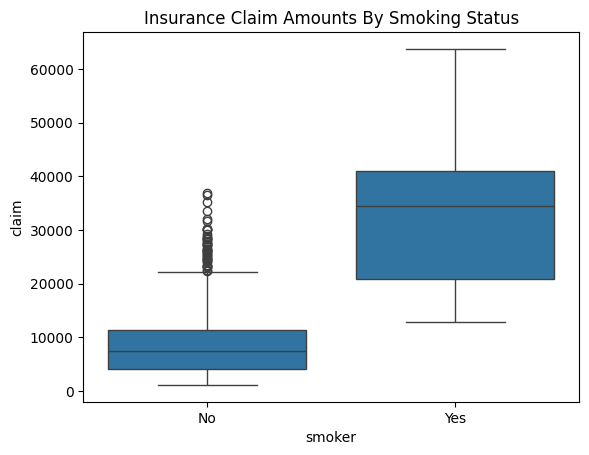

In [24]:
# Visual distribution using box plot showing the relationship between insurance claim and smoking status

sns.boxplot(data=df, x="smoker", y="claim")
plt.title('Insurance Claim Amounts By Smoking Status')
plt.savefig('images/smokers_status_claim_boxplot')
plt.show()

The above box plot shows that there is a clear difference in insurance claims between smokers and non-smokers. Smokers have a higher median claim value and also the insurance claim amounts are more widely distributed compared with non-smokers. Although there are some outliers claims for non-smokers, the chart supports the hypothesis that smokers are more likely to have higher insurance claims compared to non-smokers.

#### Hypothesis 2

* Patients with a high BMI number together with a chronic disease increase their chances of a higher insurance claim.

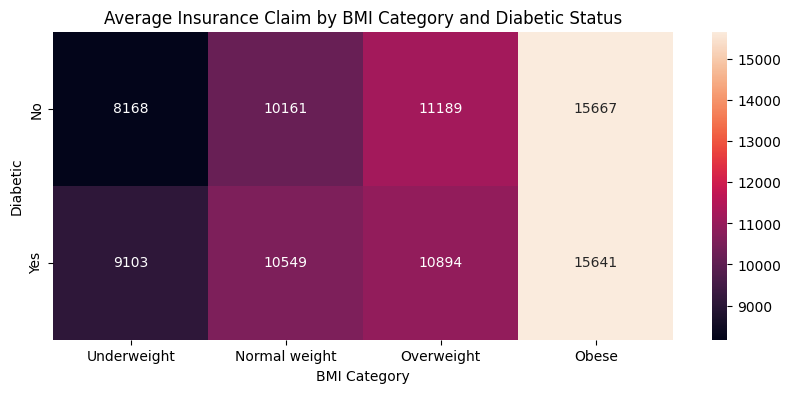

In [ ]:

# Create the pivot table (mean claim by BMI category & diabetic) - assisted by AI (ChatGPT)
pivot = df.pivot_table(
    values='claim',
    index='diabetic',        
    columns='bmi_category',  
    aggfunc='mean'           
)

# Plot heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(pivot, annot=True, fmt=".0f")  # fmt ".0f" shows whole numbers
plt.title("Average Insurance Claim by BMI Category and Diabetic Status")
plt.xlabel("BMI Category")
plt.ylabel("Diabetic")
plt.savefig('images/average_claim_chronic_heatmap')
plt.show()


#### Hypothesis 3

* Gender does not have an impact on a patient's insurance claim.

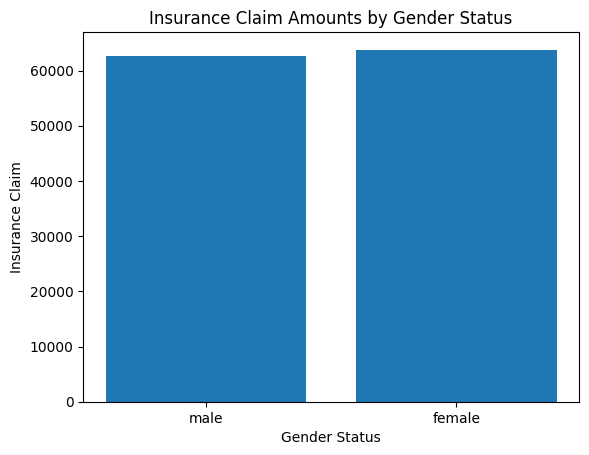

In [33]:
#accessing subset columns from the dataframe
x = df["gender"] #this code was corrected with anaconda AI. I originally had x = df(["smoker"])
y = df["claim"]
#relationship between healthcare cost with non-smokers and smokers
plt.bar(x, y)
plt.xlabel('Gender Status')
plt.ylabel('Insurance Claim')
plt.title('Insurance Claim Amounts by Gender Status')
plt.savefig("images/gender_claim_bar")
plt.show()

This bar chart shows that there is no clear difference between gender and insurance claims. This proves that a patient's gender status does not have any impact on their insurance claim amount.

---

# Conclusions and Next Steps

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.